In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, tree
from sklearn.naive_bayes import MultinomialNB

In [2]:
df1 = pd.read_csv('enronSpamSubset.csv')
df2 = pd.read_csv('completeSpamAssassin.csv')

In [3]:
df_bog = pd.read_csv('bog.csv')

In [4]:
df_tfid = pd.read_csv('tfid.csv')

In [5]:
df_ngram = pd.read_csv('bigram.csv')

In [6]:
frames = [df1, df2]
df_final = pd.concat(frames)

In [7]:
bog_train, bog_test, bog_target_train, bog_target_test = model_selection.train_test_split(df_bog, df_final['Label'], test_size=0.3, random_state=31)

In [8]:
tfid_train, tfid_test, tfid_target_train, tfid_target_test = model_selection.train_test_split(df_tfid, df_final['Label'], test_size=0.3, random_state=31)

In [9]:
ngram_train, ngram_test, ngram_target_train, ngram_target_test = model_selection.train_test_split(df_ngram, df_final['Label'], test_size=0.3, random_state=31)

### Modelo 1

In [10]:
naive_bog = MultinomialNB()
naive_bog.fit(bog_train, bog_target_train)

MultinomialNB()

In [11]:
pred_bog = naive_bog.predict(bog_test)

In [12]:
print(metrics.accuracy_score(bog_target_test, pred_bog))
print('Matriz de confusion', metrics.confusion_matrix(bog_target_test, pred_bog))
print(metrics.classification_report(bog_target_test, pred_bog, target_names=['0', '1']))

0.7611134191940174
Matriz de confusion [[2093  639]
 [ 511 1571]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2732
           1       0.71      0.75      0.73      2082

    accuracy                           0.76      4814
   macro avg       0.76      0.76      0.76      4814
weighted avg       0.76      0.76      0.76      4814



C:\Users\Ximena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


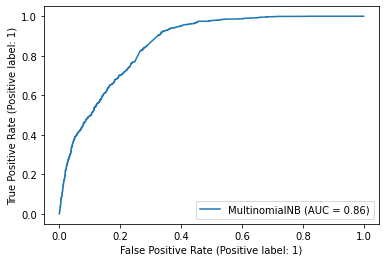

In [15]:
metrics.plot_roc_curve(naive_bog, bog_test, bog_target_test)
plt.show()

### Modelo 2

In [16]:
naive_tfid = MultinomialNB()
naive_tfid.fit(tfid_train, tfid_target_train)

MultinomialNB()

In [17]:
pred_tfid = naive_tfid.predict(tfid_test)

In [18]:
print(metrics.accuracy_score(tfid_target_test, pred_tfid))
print('Matriz de confusion', metrics.confusion_matrix(tfid_target_test, pred_tfid))
print(metrics.classification_report(tfid_target_test, pred_tfid, target_names=['0', '1']))

0.8331948483589531
Matriz de confusion [[2399  333]
 [ 470 1612]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2732
           1       0.83      0.77      0.80      2082

    accuracy                           0.83      4814
   macro avg       0.83      0.83      0.83      4814
weighted avg       0.83      0.83      0.83      4814



C:\Users\Ximena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


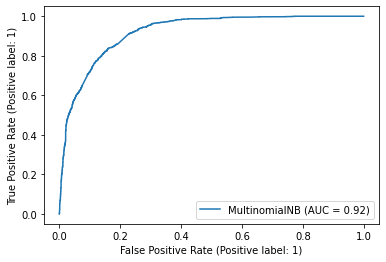

In [19]:
metrics.plot_roc_curve(naive_tfid, tfid_test, tfid_target_test)
plt.show()

### Modelo 3

In [20]:
naive_ngram = MultinomialNB()
naive_ngram.fit(ngram_train, ngram_target_train)

MultinomialNB()

In [21]:
pred_ngram = naive_ngram.predict(ngram_test)

In [22]:
print(metrics.accuracy_score(ngram_target_test, pred_ngram))
print('Matriz de confusion', metrics.confusion_matrix(ngram_target_test, pred_ngram))
print(metrics.classification_report(ngram_target_test, pred_ngram, target_names=['0', '1']))

0.7611134191940174
Matriz de confusion [[2093  639]
 [ 511 1571]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2732
           1       0.71      0.75      0.73      2082

    accuracy                           0.76      4814
   macro avg       0.76      0.76      0.76      4814
weighted avg       0.76      0.76      0.76      4814



C:\Users\Ximena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


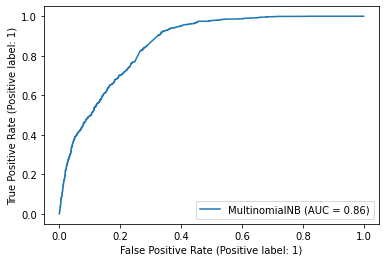

In [23]:
metrics.plot_roc_curve(naive_ngram, ngram_test, ngram_target_test)
plt.show()

### Conclusión

Como se puede observar, entre la primera y tercera representación se obtuvo resultados similares, hasta idénticos, por lo cual el que sobresale es la segunda representación.En la segunda se obtuvo una precisión de 0.84, recall de 0.83 y f1-score de 0.83. En comparación a el primero y tercera, que obtuvieron 0.76, 0.76 y 0.76 respectivamente ambos, es evidente que el segundo produjo el mejor resultado.
El segundo cuenta con un accuracy de 0.83, lo cual nos indica que el 83% de las observaciones predichas son correctas, es un resultado bastante bajo, dado que desde 0.95 se considera aceptable, pero siendo el más alto es el mejor de los presentes.
